In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [80]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import stephane.display.graphes as graphes
#import stephane.elasticity.processing as proc
import fluids2d.backlight as bl
import pims
import fluids2d.piv as piv
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import stephane.cine.cine as cine
import stephane.tools.Smath as Smath
import scipy.interpolate as interp
import sys

import stephane.analysis.cdata as cdata

import lea.h5py.h5py_convert as h5pylea
import lea.data.Data as ldata

import lea.mesure.Mesure as mesure
import lea.mesure.Volume as lvolume
import lea.mesure.Piv3D as lpiv3d

In [3]:

if sys.platform=='win32':
    base = 'F:'
if sys.platform=='linux':
    base = '/media/stephane/DATA'
if sys.platform=='darwin':
    base = '/Volumes'

date = '20181106'
folder = base+'/Experimental_data/Turbulence3d/'+date+'/'
ext = '.cine'
l=glob.glob(folder+'*'+ext)
for i,name in enumerate(l):
    print(str(i)+' : '+os.path.basename(name))

s = input()
try:
    i = int(s)
except:
    print("cannot be converted to an integer")

cinefile = l[i]

0 : PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine
1 : PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5_z450mm.cine
2 : PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm.cine
3 : PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm_EXPT2.cine
0


In [4]:
ext = '.hdf5'
l=glob.glob(folder+'*'+ext)
for i,name in enumerate(l):
    print(str(i)+' : '+os.path.basename(name))

s = input()
try:
    i = int(s)
except:
    print("cannot be converted to an integer")

filename = l[i]

0 : 20181106_1_PIV3d_nikon50mm_scale.hdf5
1 : 20181106_2_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
2 : 20181106_3_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5_z450mm.hdf5
3 : 20181106_4_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm.hdf5
4 : 20181106_5_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm_EXPT2.hdf5
5 : Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
6 : Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5_z450mm.hdf5
7 : Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm.hdf5
8 : Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm_EXPT2.hdf5
9 : Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm_EXPT2_partial.hdf5
1


In [19]:
ext = '.txt'
l=glob.glob(folder+'*'+ext)
for i,name in enumerate(l):
    print(str(i)+' : '+os.path.basename(name))

s = input()
try:
    i = int(s)
except:
    print("cannot be converted to an integer")

paramfile = l[i]

0 : PIV3dscan_nikon50mm_param_EXPT2.txt
1 : PIV3dscan_nikon50mm_param.txt
1


In [17]:
print(filename)
print(cinefile)


/media/stephane/DATA/Experimental_data/Turbulence3d/20181106/20181106_2_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
/media/stephane/DATA/Experimental_data/Turbulence3d/20181106/PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine


In [106]:
Data = h5pylea.h5py_in_Data(h5pylea.ouverture_fichier(filename)) #ouvrir un data à partir d'un hdf5 existant

Data = ldata.Data(cinefile,paramfile,spec=cinefile,date = date)

{'PIV': '3d', 'nikon': '50mm', 'random': '16', 'fps': '40k', 'Pump': '30Hz', 'f': '1kHz', 'A': '1600mV', 'line': '5'}
/media/stephane/DATA/Experimental_data/Turbulence3d/20181106/PIV3dscan_nikon50mm_param.txt


In [107]:
Data.param.__dict__

{'A': '1600mV',
 'Angle': '0',
 'Comment': 'Mesure PIV 3D sur cuve T. Jamin a MSC, balayage laser a 90degres de la camera',
 'Dcamera': '73.6',
 'Dcuves': '(40,40,63)',
 'Dlaser': '152.6',
 'Laserwidth': 'Has been increased to about 2mm to avoid loss of particles between two adjacent images, and improve contrast',
 'PIV': '3d',
 'Pump': '30Hz',
 'f': '1kHz',
 'fps': '40k',
 'fx': '0.277',
 'l_c': '44',
 'l_in': '40',
 'l_out': '48',
 'line': '5',
 'nikon': '50mm',
 'random': '16',
 'x0': '0',
 'y0': '70'}

In [108]:
m = mesure.Mesure(Data)

In [27]:
a = 'totol'

In [110]:
m.data.nb_im

127437

In [72]:
cine_name = cinefile
dataname = folder+os.path.basename(cinefile).rsplit(".",1)[0]
save_folder = folder
dx =  float(m.data.param.fx)*10**-3#7.3469357156E-05
fps = int(m.data.param.fps[:-1])*1000
flaser = int(m.data.param.f[0])*1000

dt_orig = 1./fps
crop_lims=None
pre_constructed_masker = None
t0 = 0
a_frames = np.arange(t0,10000+t0,1)
frame_diff = fps//flaser

window_size = 32
overlap = 16

processing = piv.PIVDataProcessing('',cinefile,name_for_save=dataname,dx=dx,dt_orig=dt_orig,frame_diff=frame_diff,crop_lims=crop_lims,maskers=None,window_size=window_size,overlap=overlap,search_area_size=32)
processing.associate_flowfield()

N = processing.data.ff.shape[0]
Nt = N // frame_diff
print(Nt)
print(frame_diff)
ff = processing.data.ff[:Nt*frame_diff,...]

dx : 
0.000277
dt_ab: 
0.001
3184
40


dict_keys(['cine_filepath', 'parent_folder', 'cine_name', 'maskers', 'crop_lims', 'cine_frame_shape', 'window_size', 'overlap', 'search_area_size', 'frame_diff', 'dx', 'dt_orig', 'origin_pos', 'dt_ab', 'flow_field_res_filepath', 'name_for_save'])


In [73]:
#m.add_measurement(ff,name = 'U')
ff.shape

(127360, 23, 63, 2)

In [111]:
v = lvolume.Volume(Data)

In [112]:
v = v.volume()

0 1000
0
image : 0
image : 1
image : 2
image : 3
image : 4
image : 5
image : 6
image : 7
image : 8
image : 9
image : 10
image : 11
image : 12
image : 13
image : 14
image : 15
image : 16
image : 17
image : 18
image : 19
image : 20
image : 21
image : 22
image : 23
image : 24
image : 25
image : 26
image : 27
image : 28
image : 29
image : 30
image : 31
image : 32
image : 33
image : 34
image : 35
image : 36
image : 37
image : 38
image : 39
image : 40
image : 41
image : 42
image : 43
image : 44
image : 45
image : 46
image : 47
image : 48
image : 49
image : 50
image : 51
image : 52
image : 53
image : 54
image : 55
image : 56
image : 57
image : 58
image : 59
image : 60
image : 61
image : 62
image : 63
image : 64
image : 65
image : 66
image : 67
image : 68
image : 69
image : 70
image : 71
image : 72
image : 73
image : 74
image : 75
image : 76
image : 77
image : 78
image : 79
image : 80
image : 81
image : 82
image : 83
image : 84
image : 85
image : 86
image : 87
image : 88
image : 89
image : 90


image : 692
image : 693
image : 694
image : 695
image : 696
image : 697
image : 698
image : 699
image : 700
image : 701
image : 702
image : 703
image : 704
image : 705
image : 706
image : 707
image : 708
image : 709
image : 710
image : 711
image : 712
image : 713
image : 714
image : 715
image : 716
image : 717
image : 718
image : 719
image : 720
image : 721
image : 722
image : 723
image : 724
image : 725
image : 726
image : 727
image : 728
image : 729
image : 730
image : 731
image : 732
image : 733
image : 734
image : 735
image : 736
image : 737
image : 738
image : 739
image : 740
image : 741
image : 742
image : 743
image : 744
image : 745
image : 746
image : 747
image : 748
image : 749
image : 750
image : 751
image : 752
image : 753
image : 754
image : 755
image : 756
image : 757
image : 758
image : 759
image : 760
image : 761
image : 762
image : 763
image : 764
image : 765
image : 766
image : 767
image : 768
image : 769
image : 770
image : 771
image : 772
image : 773
image : 774
imag

deuxième partie : 214
deuxième partie : 215
deuxième partie : 216
deuxième partie : 217
deuxième partie : 218
deuxième partie : 219
deuxième partie : 220
deuxième partie : 221
deuxième partie : 222
deuxième partie : 223
deuxième partie : 224
deuxième partie : 225
deuxième partie : 226
deuxième partie : 227
deuxième partie : 228
deuxième partie : 229
deuxième partie : 230
deuxième partie : 231
deuxième partie : 232
deuxième partie : 233
deuxième partie : 234
deuxième partie : 235
deuxième partie : 236
deuxième partie : 237
deuxième partie : 238
deuxième partie : 239
deuxième partie : 240
deuxième partie : 241
deuxième partie : 242
deuxième partie : 243
deuxième partie : 244
deuxième partie : 245
deuxième partie : 246
deuxième partie : 247
deuxième partie : 248
deuxième partie : 249
deuxième partie : 250
deuxième partie : 251
deuxième partie : 252
deuxième partie : 253
deuxième partie : 254
deuxième partie : 255
deuxième partie : 256
deuxième partie : 257
deuxième partie : 258
deuxième p

deuxième partie : 587
deuxième partie : 588
deuxième partie : 589
deuxième partie : 590
deuxième partie : 591
deuxième partie : 592
deuxième partie : 593
deuxième partie : 594
deuxième partie : 595
deuxième partie : 596
deuxième partie : 597
deuxième partie : 598
deuxième partie : 599
deuxième partie : 600
deuxième partie : 601
deuxième partie : 602
deuxième partie : 603
deuxième partie : 604
deuxième partie : 605
deuxième partie : 606
deuxième partie : 607
deuxième partie : 608
deuxième partie : 609
deuxième partie : 610
deuxième partie : 611
deuxième partie : 612
deuxième partie : 613
deuxième partie : 614
deuxième partie : 615
deuxième partie : 616
deuxième partie : 617
deuxième partie : 618
deuxième partie : 619
deuxième partie : 620
deuxième partie : 621
deuxième partie : 622
deuxième partie : 623
deuxième partie : 624
deuxième partie : 625
deuxième partie : 626
deuxième partie : 627
deuxième partie : 628
deuxième partie : 629
deuxième partie : 630
deuxième partie : 631
deuxième p

deuxième partie : 960
deuxième partie : 961
deuxième partie : 962
deuxième partie : 963
deuxième partie : 964
deuxième partie : 965
deuxième partie : 966
deuxième partie : 967
deuxième partie : 968
deuxième partie : 969
deuxième partie : 970
deuxième partie : 971
deuxième partie : 972
deuxième partie : 973
deuxième partie : 974
deuxième partie : 975
deuxième partie : 976
deuxième partie : 977
deuxième partie : 978
deuxième partie : 979
deuxième partie : 980
deuxième partie : 981
deuxième partie : 982
deuxième partie : 983
deuxième partie : 984
deuxième partie : 985
deuxième partie : 986
deuxième partie : 987
deuxième partie : 988
deuxième partie : 989
deuxième partie : 990
deuxième partie : 991
deuxième partie : 992
deuxième partie : 993
deuxième partie : 994
1
2


In [113]:
v.m['instantV'][0]

(7, 27)

In [5]:
cinefile

'/media/stephane/DATA/Experimental_data/Turbulence3d/20181106/PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine'

In [74]:
 #convert 2d to 3d data
(Nt,Nx,Ny,Nc) = ff.shape
ff = np.reshape(ff,(int(Nt/frame_diff),frame_diff,Nx,Ny,Nc))

#keep only one way volume scan
#ff = ff[...]

ff[...,1] = -ff[...,1] #reverse sign of horizontal component
#ff=ff[:,9:25,...]
(start,end) = v.m['instantV'][0]
ff=ff[:,start+2:end-2,...]

print(ff.shape)

(3184, 16, 23, 63, 2)


In [75]:
def nancount(data):
    print(data.shape)
    Nnan = np.sum(np.ndarray.flatten(np.isnan(data)))
    N = np.prod(data.shape)
    print('Ratio nan :' +str(Nnan/N))
    print('nan number :'+str(Nnan))

In [76]:
nancount(ff)
ff = ff[...,1:-1,1:-1,:]
nancount(ff)

(3184, 16, 23, 63, 2)
Ratio nan :0.07385668313097579
nan number :10903884
(3184, 16, 21, 61, 2)
Ratio nan :2.9896138577352023e-05
nan number :3902


In [77]:
Nt = ff.shape[0]
for i in range(Nt):
    for j in range(2):
        data = np.squeeze(ff[i,...,j])
        indices = np.where(np.isnan(data))
        (t0,t1,t2) = indices
        for tup in zip(t0,t1,t2):
            data = cdata.replace_nan(data,tup)
        ff[i,...,j]=data
nancount(ff)

(3184, 16, 21, 61, 2)
Ratio nan :0.0
nan number :0


In [114]:
piv = lpiv3d.Piv3D(Data)
piv.m['U'] = ff
#piv.m['t'] = 

In [168]:
#processing.__dict__.pop('data')
print(processing.__dict__.keys())
piv.m.update(processing.__dict__)

dict_keys(['cine_filepath', 'parent_folder', 'cine_name', 'maskers', 'crop_lims', 'cine_frame_shape', 'window_size', 'overlap', 'search_area_size', 'frame_diff', 'dx', 'dt_orig', 'origin_pos', 'dt_ab', 'flow_field_res_filepath', 'name_for_save'])


In [115]:
m.add_measurement(piv)
m.add_measurement(v)

In [122]:
print(m.PIV3D.m['U'].shape)
print(m.Volume.m['tV'])

(3184, 16, 21, 61, 2)
[0.00042499974370002747, 0.000924999825656414, 0.001424998976290226, 0.0019249990582466125, 0.002424999140202999, 0.0029249992221593857, 0.0034249993041157722, 0.003924999386072159, 0.004424999468028545, 0.004924999549984932, 0.0054249996319413185, 0.0059249987825751305, 0.006424998864531517, 0.006924998946487904, 0.00742499902844429, 0.007924999110400677, 0.008424999192357063, 0.00892499927431345, 0.009424999356269836, 0.009924998506903648, 0.010424998588860035, 0.010924998670816422, 0.011424998752772808, 0.011924998834729195, 0.012424998916685581, 0.012924998998641968, 0.013424999080598354, 0.013924999162554741, 0.014424998313188553, 0.01492499839514494, 0.015424998477101326, 0.015924998559057713, 0.0164249986410141, 0.016924998722970486, 0.017424998804926872, 0.01792499888688326, 0.018424998968839645, 0.018924998119473457, 0.019424998201429844, 0.01992499828338623, 0.020424998365342617, 0.020924998447299004, 0.02142499852925539, 0.021924998611211777, 0.02242499

In [124]:
f = h5pylea.file_name_in_dir(m, os.path.dirname(cinefile)+'/Mesure_20181114/')
h5pylea.obj_in_h5py(m,f)
f.close()

/media/stephane/DATA/Experimental_data/Turbulence3d/20181106/PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine
cine
62642432492
127437
[[255  30  27 ...  32  51  45]
 [255  31  29 ...  33  34  36]
 [255  28  27 ...  31  32  33]
 ...
 [255  38  43 ...  41  46  91]
 [255  35  38 ...  45  42  49]
 [255  32  36 ...  36  39  44]]
0.277
Mesure PIV 3D sur cuve T. Jamin a MSC, balayage laser a 90degres de la camera
40
48
44
152.6
73.6
0
0
70
(40,40,63)
Has been increased to about 2mm to avoid loss of particles between two adjacent images, and improve contrast
3d
50mm
16
40k
30Hz
1kHz
1600mV
5
1
Non spécifié
SPerrard
20181106
1032
{}
/media/stephane/DATA/Experimental_data/Turbulence3d/20181106/PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine
cine
62642432492
127437
[[255  30  27 ...  32  51  45]
 [255  31  29 ...  33  34  36]
 [255  28  27 ...  31  32  33]
 ...
 [255  38  43 ...  41  46  91]
 [255  35  38 ...  45  42  49]
 [255  32  36 ...  36  3

/media/stephane/DATA/Experimental_data/Turbulence3d/20181106/PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine
cine
62642432492
127437
[[255  30  27 ...  32  51  45]
 [255  31  29 ...  33  34  36]
 [255  28  27 ...  31  32  33]
 ...
 [255  38  43 ...  41  46  91]
 [255  35  38 ...  45  42  49]
 [255  32  36 ...  36  39  44]]
0.277
Mesure PIV 3D sur cuve T. Jamin a MSC, balayage laser a 90degres de la camera
40
48
44
152.6
73.6
0
0
70
(40,40,63)
Has been increased to about 2mm to avoid loss of particles between two adjacent images, and improve contrast
3d
50mm
16
40k
30Hz
1kHz
1600mV
5
1
Non spécifié
SPerrard
20181106
1032
{}
{'instantV': [b'(7, 27)', b'(47, 27)', b'(47, 67)', b'(87, 67)', b'(87, 107)', b'(127, 107)', b'(127, 147)', b'(167, 147)', b'(167, 187)', b'(207, 187)', b'(207, 227)', b'(247, 227)', b'(247, 267)', b'(287, 267)', b'(287, 307)', b'(327, 307)', b'(327, 347)', b'(367, 347)', b'(367, 387)', b'(407, 387)', b'(407, 427)', b'(447, 427)', b'(447, 4

In [125]:
f.close()

In [126]:
#compute mean_flow
mean_flow = np.nanmean(ff,axis=0)
mean_flow_speed = np.linalg.norm(mean_flow,axis=2)
mean_speed = np.nanmean( np.sqrt(ff[...,0]**2 + ff[...,1]**2 ), axis=0)
fluc = ff - mean_flow    
u_rms = np.sqrt(np.nanmean(fluc[...,0]**2+fluc[...,1]**2 ,axis=0) )

In [127]:
piv.m['mean_flow'] = mean_flow
piv.m['fluc'] = fluc
piv.m['u_rms'] = u_rms

In [155]:
m.PIV3D.m.keys()

dict_keys(['U', 'mean_flow', 'fluc', 'u_rms'])

In [169]:
filename = glob.glob(os.path.dirname(cinefile)+'/Mesure_20181114/*.hdf5')[0]
print(filename)
f = h5pylea.ouverture_fichier(filename, mode="r+")
h5pylea.obj_in_h5py(m,f)
f.close()

/media/stephane/DATA/Experimental_data/Turbulence3d/20181106/Mesure_20181114/Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
/media/stephane/DATA/Experimental_data/Turbulence3d/20181106/PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine
cine
62642432492
127437
[[255  30  27 ...  32  51  45]
 [255  31  29 ...  33  34  36]
 [255  28  27 ...  31  32  33]
 ...
 [255  38  43 ...  41  46  91]
 [255  35  38 ...  45  42  49]
 [255  32  36 ...  36  39  44]]
0.277
Mesure PIV 3D sur cuve T. Jamin a MSC, balayage laser a 90degres de la camera
40
48
44
152.6
73.6
0
0
70
(40,40,63)
Has been increased to about 2mm to avoid loss of particles between two adjacent images, and improve contrast
3d
50mm
16
40k
30Hz
1kHz
1600mV
5
1
Non spécifié
SPerrard
20181106
1032
{}
/media/stephane/DATA/Experimental_data/Turbulence3d/20181106/PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine
cine
62642432492
127437
[[255  30  27

[[[[ 5.54287617e-02  1.33094481e-01]
   [ 6.05419195e-02  1.36149026e-01]
   [ 6.46130156e-02  1.34862277e-01]
   ...
   [ 9.70305884e-02 -3.10929293e-01]
   [ 9.91760611e-02 -3.05559416e-01]
   [ 1.03790293e-01 -3.04166719e-01]]

  [[ 6.02285339e-02  1.34078305e-01]
   [ 6.03686946e-02  1.34778364e-01]
   [ 6.14849957e-02  1.34040299e-01]
   ...
   [ 1.06476909e-01 -3.12876190e-01]
   [ 1.10122684e-01 -3.07118043e-01]
   [ 1.13238025e-01 -2.98073560e-01]]

  [[ 6.82385601e-02  1.34052171e-01]
   [ 6.36511501e-02  1.35225559e-01]
   [ 5.90143758e-02  1.33839523e-01]
   ...
   [ 1.15810049e-01 -3.19653389e-01]
   [ 1.18526625e-01 -3.12822141e-01]
   [ 1.17739200e-01 -3.03557423e-01]]

  ...

  [[ 5.20253257e-02  2.18512195e-01]
   [ 6.07078856e-02  2.13338630e-01]
   [ 6.91556785e-02  2.09195338e-01]
   ...
   [ 1.16998326e-01 -3.74210105e-01]
   [ 1.19792518e-01 -3.63756819e-01]
   [ 1.24654671e-01 -3.41295417e-01]]

  [[ 4.96683322e-02  2.14030506e-01]
   [ 5.22773228e-02  2.08088506e

[[[0.14613838 0.14819485 0.14913399 ... 0.24187007 0.23679554 0.23034442]
  [0.14449894 0.14607998 0.1492635  ... 0.24893    0.24384362 0.28971129]
  [0.14235904 0.14482717 0.1527559  ... 0.25378786 0.24792583 0.25095396]
  ...
  [0.15225412 0.14391383 0.14541664 ... 0.32687396 0.32873091 0.32135176]
  [0.15992605 0.15374651 0.15544122 ... 0.33286738 0.33423627 0.32969316]
  [0.1688302  0.16598609 0.17324808 ... 0.3334956  0.33701105 0.33520015]]

 [[0.14510276 0.14676528 0.14622887 ... 0.23971636 0.23427409 0.2275896 ]
  [0.1423468  0.14339968 0.14737088 ... 0.24557964 0.24197068 0.24025035]
  [0.13927816 0.14184807 0.15046404 ... 0.25107335 0.24810362 0.24929923]
  ...
  [0.14838767 0.13925521 0.14616086 ... 0.32724198 0.32652899 0.31960693]
  [0.15816705 0.15136966 0.15532173 ... 0.33319773 0.33319461 0.32894292]
  [0.16830061 0.16630772 0.17479219 ... 0.33162503 0.33794674 0.33318847]]

 [[0.1414118  0.14463132 0.14519134 ... 0.23694618 0.23004614 0.22432138]
  [0.13937588 0.141679

In [ ]:
V = fluc[...,0]
[n,x] = np.histogram(np.ndarray.flatten(V),np.arange(-0.7,0.7,0.05))
x = (x[1:]+x[:-1])/2
plt.semilogy(x,n)

In [68]:
fluc.shape

(3150, 16, 21, 61, 2)

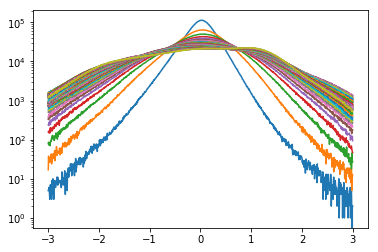

In [157]:
blist = np.arange(1,50)
Vs = []
stdfluc = np.std(fluc[...,50:,0])

for b in blist:
    V = (fluc[...,50:,0]-fluc[...,50-b:-b,0])/stdfluc
    [n,x] = np.histogram(np.ndarray.flatten(V),1000,[-3,3])
    x = (x[1:]+x[:-1])/2
    plt.semilogy(x,n)
    Vs.append(np.std(V))
    
Vs = np.asarray(Vs)

In [162]:
m.PIV3D.m.keys()

dict_keys(['U', 'mean_flow', 'fluc', 'u_rms'])

/home/stephane/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:1708: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  self.set_ylim([v[2], v[3]], emit=emit, auto=False)


[1, 100, 0, 1.5]

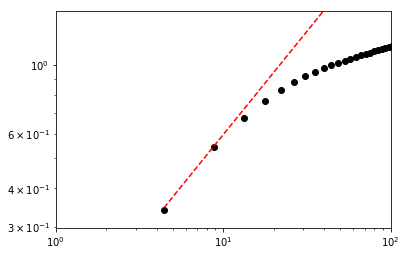

In [181]:
Vs = np.asarray(Vs)

blist = np.arange(1,50)
blist = blist*piv.m['overlap']*float(m.data.param.fx)
plt.loglog(blist,Vs,'ko')

b0 = 4.5
alpha = 2./3

plt.loglog(blist,0.35*(blist/b0)**alpha,'r--')
plt.axis([1,100,0,1.5])

graphes.legende('$r$ (mm)','$<(\delta u)^2>$','')

In [172]:
piv.m['overlap']
m.data.param.fx

'0.277'

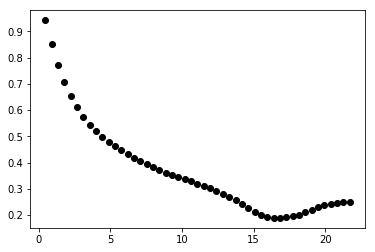

In [139]:
n = len(blist)
fx = 0.0277
overlap = 16
blist = np.arange(1,50)
blist = blist*overlap*fx
plt.plot(blist,1-Vs**2/2,'ko')

b0 = 10
alpha = -0.8
#plt.plot(blist,0.5*(blist/b0)**alpha,'r--')
#plt.axis([1,30,0.2,1])
#plt.axis([0,25,0,0.3])
#    plt.semilogy(-x,n,'r')

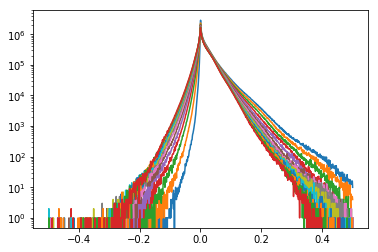

In [95]:
for b in range(1,15):
    V = fluc[...,30:,0]*fluc[...,30-b:-b,0]
    [n,x] = np.histogram(np.ndarray.flatten(V),1000,[-0.5,0.5])
    x = (x[1:]+x[:-1])/2
    plt.semilogy(x,n)
#    plt.semilogy(-x,n,'r')

In [154]:
Eku = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,0]**2,axes=(1,2,3)),axes=(1,2,3)))
Ekw = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,1]**2,axes=(1,2,3)),axes=(1,2,3)))

(16, 21, 61)
[6.697355834340246, 7.201182722328115, 7.847606651897178, 6.197127223118561, 7.516317892450187, 7.421051826963084, 6.4642190603867435, 6.147444152833718, 4.5931028692803055, 6.564419509008788, 4.638896560491115, 5.974622852647235, 4.188501486590925, 4.7012301965227214, 5.798854394470463, 4.64881731875438, 4.088629351234285, 4.024423189207967, 4.347110929445808, 3.9979212098742996, 3.2598428724345805, 4.071001880688259, 4.3972297891934495, 3.4052636202649365, 3.532885725760589, 3.508153533632892, 3.079728967506241, 2.9130443985171057, 3.414438033404115, 3.3519731255482075, 2.989781679669541, 3.1063926001336117, 2.7039250282162306, 2.6307744816320215, 2.743211512437868, 2.431673377031739, 2.5272262628641418, 2.3739892753530523, 2.3064014229523266, 2.409945451757108, 2.2737334653834242, 2.15381073934793, 2.2219019046219617, 2.0987495531309768, 2.131463700544318, 1.9330883553314524, 2.054444635449597, 1.8344576526698602, 1.9418828562469348, 1.6918686333731632, 1.86179161529998

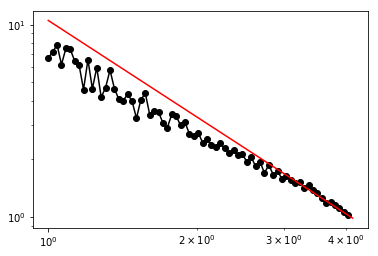

In [160]:
(Nt,Nz,Nx,Ny) = Ek.shape

fx = 0.277
dz = 44/20
k0x = 1/(2*fx*overlap)
k0z = 1/(2*dz)

kx = k0x*np.linspace(-Nx//2,Nx//2,Nx)
ky = k0x*np.linspace(-Ny//2,Ny//2,Ny)
kz = k0z*np.linspace(-Nz//2,Nz//2,Nz)

[Kx,Kz,Ky] = np.meshgrid(kx,kz,ky)
print(Kx.shape)

K = np.sqrt(Kx**2 + Ky**2 + Kz**2)

Klist = np.logspace(0,np.log10(np.max(K)),70)
E1d = []
for i,k0 in enumerate(Klist[:-1]):
    indices = np.logical_and(K>=Klist[i],K<Klist[i+1])
    #print(Ek[250,indices])
    val = np.nanmean(Ekw[:,indices])#*(Klist[i+1]-Klist[i])#*Klist[i]**2
    E1d.append(val)

print(E1d)
plt.loglog(Klist[:-1],E1d,'ko-')
plt.loglog(Klist,10.5*Klist**(-5./3),'r-')

In [158]:
10**-1.7

0.0199526231496888

dx : 
0.000277
dt_ab: 
0.001


In [27]:
ff.shape

(126000, 23, 63, 2)

(3150, 16, 23, 63, 2)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


24


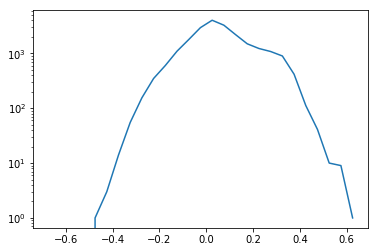

In [61]:
def display_correlation(t,C):
    plt.subplot(1,3,1)
    plt.plot(t,C)
    plt.axis([-250,250,-0.2,1.05])
    graphes.legende('Time (ms)','$<u(t)u(t+\Delta t) >_{x,y,z}$','')

    plt.subplot(1,3,2)
    plt.plot(t,C)
    plt.axis([-75,75,0.75,1.05])
    graphes.legende('Time (ms)','','')

    plt.subplot(1,3,3)
    plt.plot(t,C)
    plt.axis([-15,15,0.9,1.01])
    graphes.legende('Time (ms)','','')

Total number of frames processed : 250


/home/stephane/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Volume with less than 5% error : 250


/home/stephane/.local/lib/python3.6/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


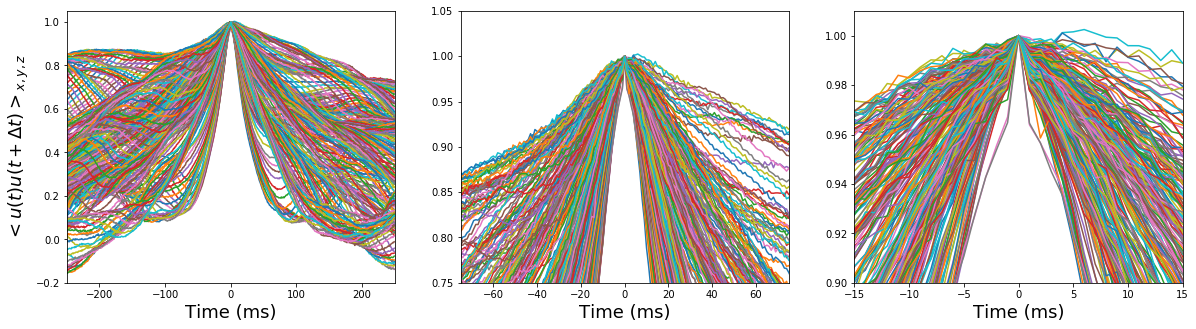

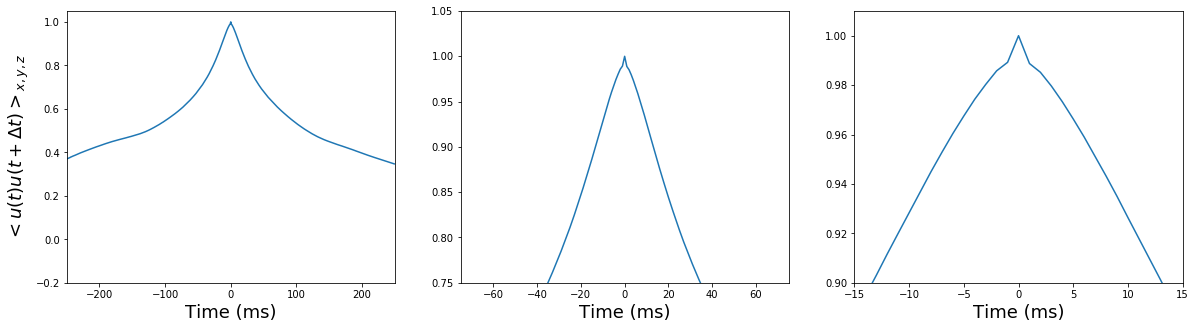

In [62]:
fig,axs=plt.subplots(1,3,figsize=(20,5))

good_frame = []
Ct = []
error = []
tlist = range(250,2750,10)
print("Total number of frames processed : "+str(len(tlist)))

for t0 in tlist:
    ff2 = np.nanmean(fluc[t0,...,0]**2,axis=(0,1,2))
    C = []
    t = np.arange(t0-250,t0+250,1)
    
    C0 = np.nanmean(fluc[t0+1,...,0]*fluc[t0,...,0],axis=(0,1,2))/ff2
    error.append(1-C0)
    if C0>0.95:  
        for tc in t:
#    print(tc)
            C0 = np.nanmean(fluc[tc,...,0]*fluc[t0,...,0],axis=(0,1,2))/ff2
            C.append(C0) 
        display_correlation(t-t0,C)        
        Ct.append(C)
        good_frame.append(t0)
Ct = np.asarray(Ct)

print("Volume with less than 5% error : "+str(Ct.shape[0]))
Ctmean = np.nanmean(Ct,axis=0)
tmean = t-t0

fig,axs=plt.subplots(1,3,figsize=(20,5))
display_correlation(tmean,Ctmean)

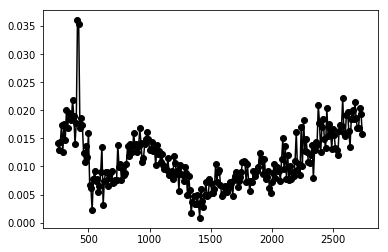

In [64]:
plt.plot(tlist,error,'ko-')
#plt.axis([1500,1600,0,0.8])

In [211]:
print(fluc.shape)

(2999, 40, 23, 63, 2)


Correlation time (ms) : 116 ms


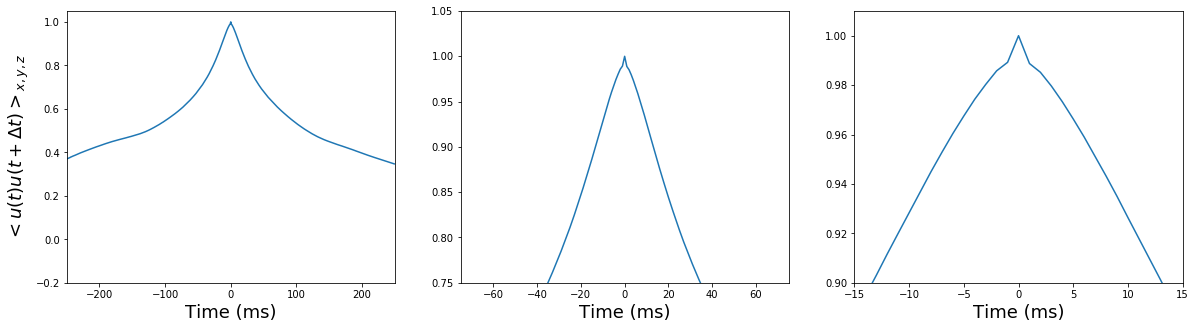

In [65]:
fig,axs=plt.subplots(1,3,figsize=(20,5))
display_correlation(tmean,Ctmean)

i = np.argmin(np.abs(Ctmean-0.5))
print('Correlation time (ms) : '+str(np.abs(tmean[i])) +' ms')

In [341]:
1024/384
41/17

2.411764705882353

In [66]:
#generate axis
(Nz,Nx,Ny,Nc) = mean_flow.shape
#mean_flow = np.transpose(mean_flow,(1,2,0,3))

dz = 42/20
x = np.arange(-(Nx-1)/2,(Nx-1)/2+1)*processing.dx*1E3*overlap+5
y = np.arange(-(Ny-1)/2,(Ny-1)/2+1)*processing.dx*1E3*overlap-120
z = np.arange(-Nz/2,Nz/2)*dz-2

#invariance by rotation in the plane (x,z)

[X,Z,Y] = np.meshgrid(x,z,y)
print(X.shape)

(16, 21, 61)


In [52]:
Xv = X[:,:-1,:-1]
Yv = Y[:,:-1,:-1]
Zv = Z[:,:-1,:-1]

flucv = fluc[...,:-1,:-1,:]

(Nz,Nx,Ny) = Xv.shape
(k0,i0,j0) = tuple(np.asarray(Xv.shape)//2)

#j0 = 4
print(Xv.shape)

x0 = Xv[k0,i0,j0]
y0 = Yv[k0,i0,j0]
z0 = Zv[k0,i0,j0]

R = np.sqrt((Xv-x0)**2+(Yv-y0)**2+(Zv-z0)**2)

ff2u = np.nanmean(flucv[:,k0,i0,j0,0]**2)
ff2v = np.nanmean(flucv[:,k0,i0,j0,1]**2)

Cmapu = flucv[...,0]*np.transpose(np.tile(flucv[:,k0,i0,j0,0],(Nz,Nx,Ny,1)),(3,0,1,2))
Cmapv = flucv[...,1]*np.transpose(np.tile(flucv[:,k0,i0,j0,1],(Nz,Nx,Ny,1)),(3,0,1,2))

print(Cmapu.shape)

(16, 22, 62)
(3150, 16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


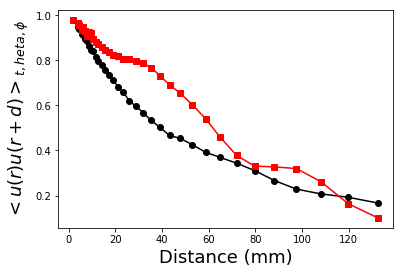

In [40]:
dlist = np.logspace(0,np.log10(np.max(R)),50)

Cdu = []
Cdv = []
for i,d in enumerate(dlist[:-1]):
    indices = np.logical_and(R>=dlist[i],R<dlist[i+1])
    #print(np.sum(indices))
    C0u = np.nanmean(Cmapu[:,indices])/ff2u
    C0v = np.nanmean(Cmapv[:,indices])/ff2v

    Cdu.append(C0u)
    Cdv.append(C0v)
    
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')

fig = graphes.legende('Distance (mm)','$<u(r)u(r+d) >_{t,\theta,\phi}$','')

(16, 22, 62)
(1062, 16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


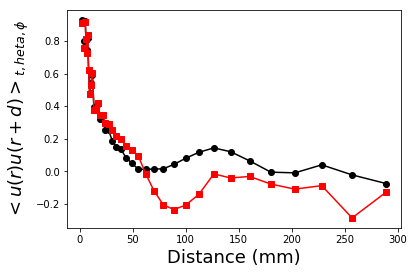

In [260]:
Xv = X[2:18,:-1,:-1]
Yv = Y[2:18,:-1,:-1]
Zv = Z[2:18,:-1,:-1]

flucv = fluc[:,2:18,:-1,:-1,:]

(Nz,Nx,Ny) = Xv.shape
(k0,i0,j0) = tuple(np.asarray(Xv.shape)//2)

j0 = 4
print(Xv.shape)

x0 = Xv[k0,i0,j0]
y0 = Yv[k0,i0,j0]
z0 = Zv[k0,i0,j0]

R = np.sqrt((Xv-x0)**2+(Yv-y0)**2+(Zv-z0)**2)

ff2u = np.nanmean(flucv[good_frame,k0,i0,j0,0]**2)
ff2v = np.nanmean(flucv[good_frame,k0,i0,j0,1]**2)

Cmapu = flucv[good_frame,...,0]*np.transpose(np.tile(flucv[good_frame,k0,i0,j0,0],(Nz,Nx,Ny,1)),(3,0,1,2))
Cmapv = flucv[good_frame,...,1]*np.transpose(np.tile(flucv[good_frame,k0,i0,j0,1],(Nz,Nx,Ny,1)),(3,0,1,2))

print(Cmapu.shape)
dlist = np.logspace(0,np.log10(np.max(R)),50)

Cdu = []
Cdv = []
for i,d in enumerate(dlist[:-1]):
    indices = np.logical_and(R>=dlist[i],R<dlist[i+1])
    #print(np.sum(indices))
    C0u = np.nanmean(Cmapu[:,indices])/ff2u
    C0v = np.nanmean(Cmapv[:,indices])/ff2v

    Cdu.append(C0u)
    Cdv.append(C0v)
    
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')

fig = graphes.legende('Distance (mm)','$<u(r)u(r+d) >_{t,\theta,\phi}$','')

In [67]:
Xv = X[:,:-1,:-1]
Yv = Y[:,:-1,:-1]
Zv = Z[:,:-1,:-1]

flucv = fluc[...,:-1,:-1,:]

(Nz,Nx,Ny) = Xv.shape
(k0,i0,j0) = tuple(np.asarray(Xv.shape)//2)

j0 = 60
#i0 = 20

x0 = Xv[k0,i0,j0]
y0 = Yv[k0,i0,j0]
z0 = Zv[k0,i0,j0]

[R,Theta] = Smath.cart2pol(Xv-x0,Yv-y0)
#R = np.sqrt((Xv-x0)**2+(Yv-y0)**2)


ff2u = np.nanmean(flucv[...,i0,j0,0]**2)
ff2v = np.nanmean(flucv[...,i0,j0,1]**2)

Cmapu = flucv[...,0]*np.transpose(np.tile(flucv[...,i0,j0,0],(Nx,Ny,1,1)),(2,3,0,1))
Cmapv = flucv[...,1]*np.transpose(np.tile(flucv[...,i0,j0,1],(Nx,Ny,1,1)),(2,3,0,1))

print(Cmapu.shape)
dlist = np.logspace(np.log10(1),np.log10(np.max(R)),50)

Cdu = []
Cdv = []
Cd = []
for i,d in enumerate(dlist[:-1]):
    indices = np.logical_and(R>=dlist[i],R<dlist[i+1])
    #print(np.sum(indices))
    C0u = np.nanmean(Cmapu[...,indices])
    C0v = np.nanmean(Cmapv[...,indices])
    
    Cd.append((C0u+C0v)/(ff2u+ff2v))
#    C0l = 
#    C0t = 
    Cdu.append(C0u/ff2u)
    Cdv.append(C0v/ff2v)

fig,axs=plt.subplots(1,2,figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(dlist[:-1],Cd,'bo-')
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')
plt.axis([0,50,0,1])
fig = graphes.legende('Distance (mm)','$<u(r)u(r+d) >_{t,\theta,\phi}$','')
                  
plt.subplot(1,2,2)
plt.plot(dlist[:-1],Cd,'bo-')
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')
plt.plot(dlist,np.zeros(len(dlist)),'k--')
plt.axis([0,300,-0.5,1])
fig = graphes.legende('Distance (mm)','','')

IndexError: index 60 is out of bounds for axis 2 with size 60

In [60]:
Ek = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,:-1,:-1,0]**2,axes=(1,2,3)),axes=(1,2,3)))

In [61]:
print(Ek.shape)
np.sum(np.isnan(np.ndarray.flatten(Ek)))

(3150, 16, 22, 62)


68745600

(16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


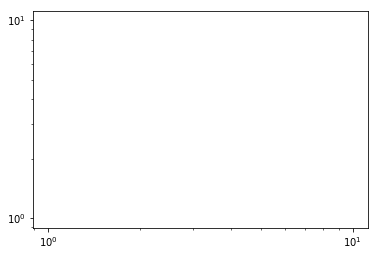

In [64]:
Ek = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,:-1,:-1,0]**2,axes=(1,2,3)),axes=(1,2,3)))

(Nt,Nz,Nx,Nt) = Ek.shape

kx = np.linspace(-Nx//2,Nx//2,Nx)
ky = np.linspace(-Ny//2,Ny//2,Ny)
kz = np.linspace(-Nz//2,Nz//2,Nz)

[Kx,Kz,Ky] = np.meshgrid(kx,kz,ky)
print(Kx.shape)

K = np.sqrt(Kx**2 + Ky**2 + Kz**2)

Klist = np.logspace(0,np.log10(np.max(K)),50)
E1d = []
for i,k0 in enumerate(Klist[:-1]):
    indices = np.logical_and(K>=Klist[i],K<Klist[i+1])
    #print(Ek[250,indices])
    val = np.nanmean(Ek[:,indices])
    E1d.append(val)

print(E1d)
plt.loglog(Klist[:-1],E1d,'ko-')
#plt.loglog(Klist,100*Klist**(-5./3),'r-')

In [266]:
a = np.ones((299,40))
np.transpose(np.tile(a,(23,63,1,1)),(2,3,0,1)).shape

(299, 40, 23, 63)

1475


[1200, 1750, -0.2, 1.05]

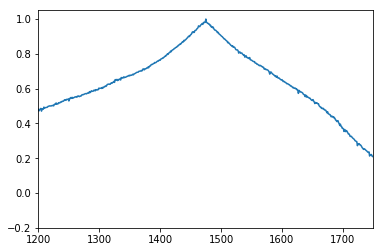

In [111]:
t = np.arange(0,2950,1)
n = len(t)
t0 = t[(n+1)//2]
print(t0)
ff2 = np.nanmean(fluc[t0,2:18,...,1]**2,axis=(0,1,2))
C = []
for tc in t:
#    print(tc)
    C.append(np.nanmean(fluc[tc,2:18,...,1]*fluc[t0,2:18,...,1],axis=(0,1,2))/ff2) 
plt.plot(t,C)
plt.axis([1200,1750,-0.2,1.05])

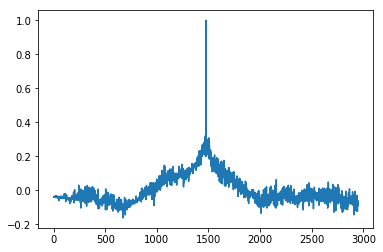

In [28]:
print(mean_flow.shape)
print(X[:,:,:].shape)

(40, 23, 63, 2)
(40, 23, 63)


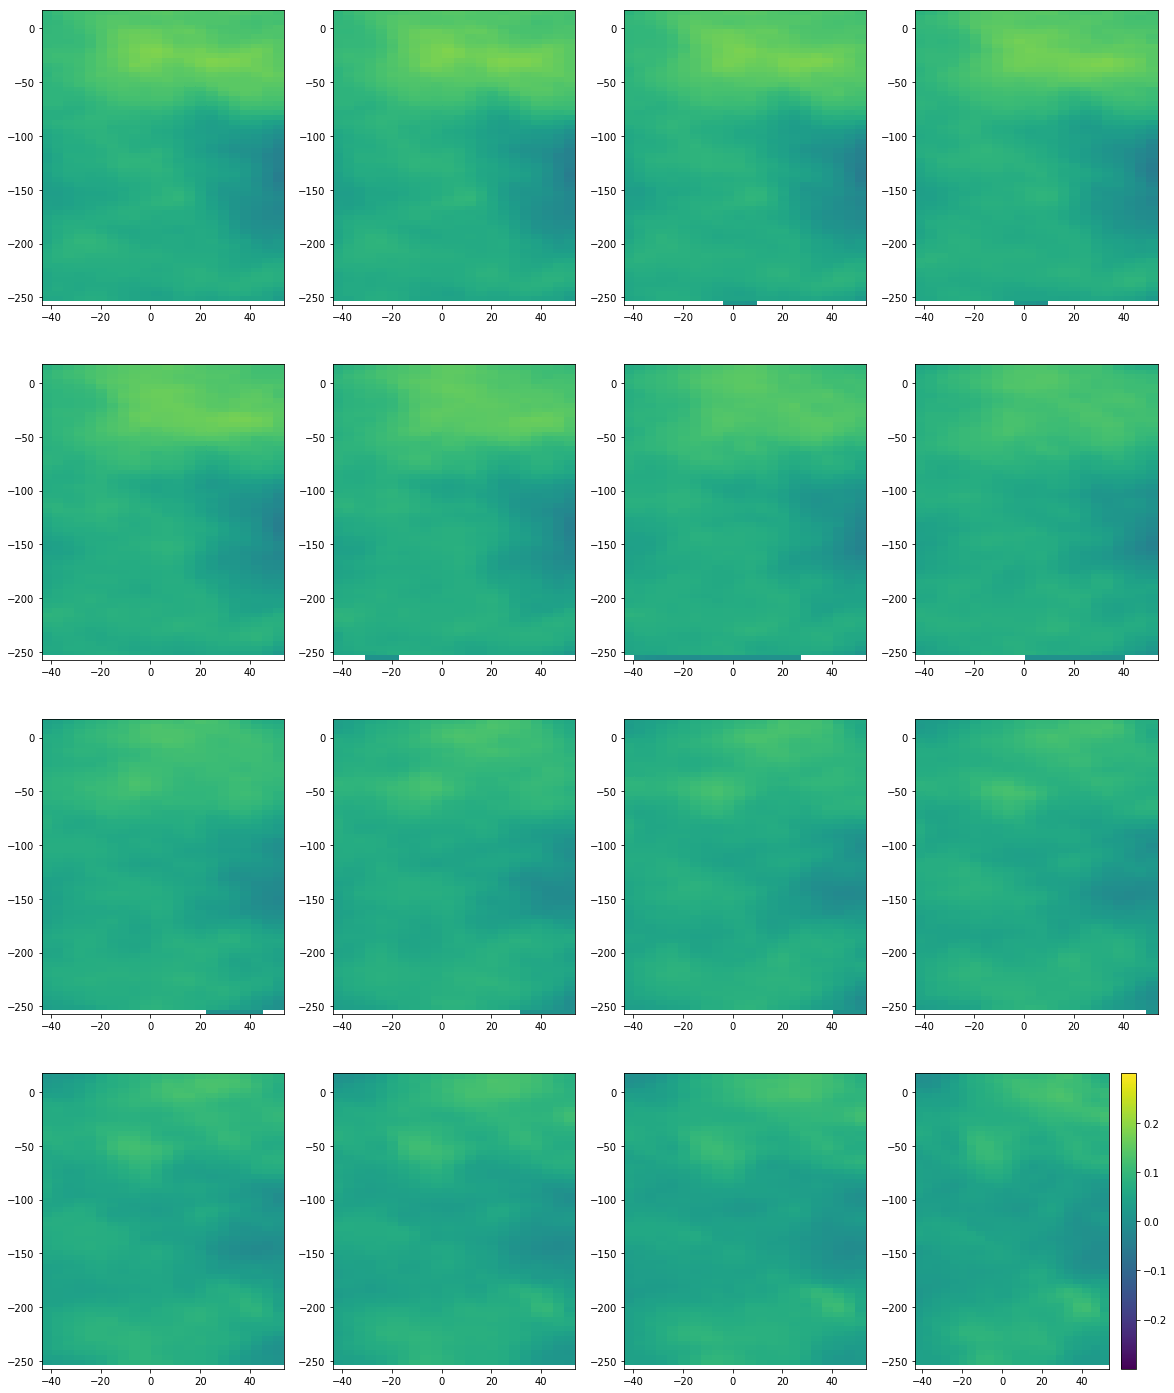

In [68]:
fig,axs=plt.subplots(4,4,figsize=(20,25))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.pcolormesh(X[0,...],Y[0,...],mean_flow[i*4+j,...,0],vmin=-0.3,vmax=0.3)
#    plt.colorbar()
plt.colorbar()

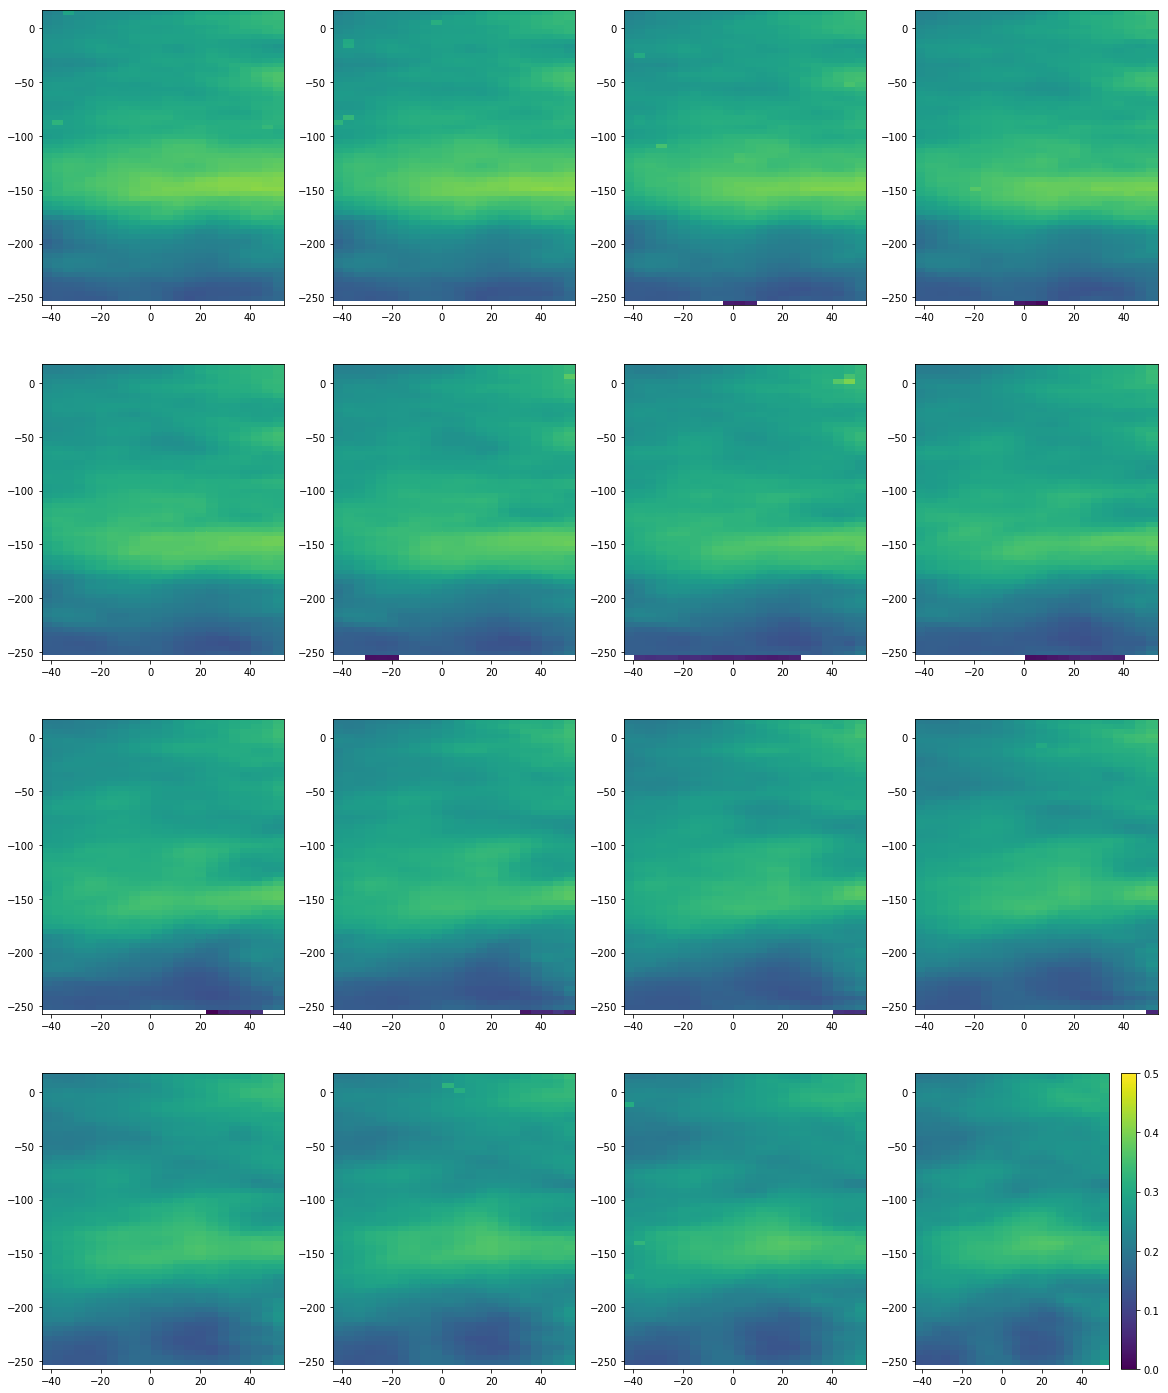

In [67]:
fig,axs=plt.subplots(4,4,figsize=(20,25))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.pcolormesh(X[0,...],Y[0,...],u_rms[i*4+j,...],vmin=0,vmax=0.5)
plt.colorbar()

(23, 63)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


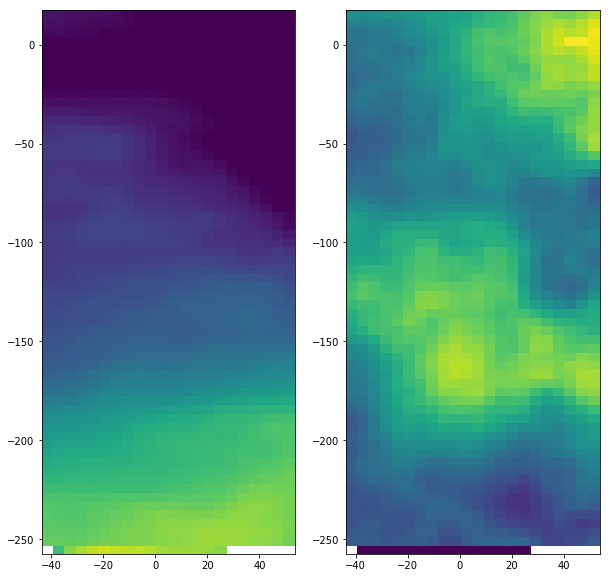

In [69]:
fig,axs=plt.subplots(1,2,figsize=(10,10))
print(mean_flow[10,...,0].shape)
axs[0].pcolormesh(X[0,...],Y[0,...],mean_flow[6,...,1],vmin=-0.3,vmax=0.3)
#plt.colorbar()

axs[1].pcolormesh(X[0,...],Y[0,...],np.nanmean(fluc[:,6,...,0]**2,axis=0),vmin=0,vmax=0.05)
#plt.colorbar()

In [338]:
[R,Theta] = Smath.cart2pol(X,Z)
Ur = 2*mean_flow[...,1]*np.cos(Theta)  #coefficient to be compensated by the circle fraction avalaible, so the coeff is r dependent
Utheta = -2*mean_flow[...,1]*np.sin(Theta) #average along Theta still required

fur = interp.RegularGridInterpolator((z,x,y),Ur,method='linear',bounds_error=False,fill_value=np.nan)
fut = interp.RegularGridInterpolator((z,x,y),Utheta,method='linear',bounds_error=False,fill_value=np.nan)
fuz = interp.RegularGridInterpolator((z,x,y),mean_flow[...,0],method='linear',bounds_error=False,fill_value=np.nan)

#futheta = interp.RegularGridInterpolator(Utheta, values, method='linear', bounds_error=True, fill_value=nan)[source]


In [248]:
print(Ur.shape)

(16, 31, 63)


In [242]:
helicity = fur((R[:,:,40]*np.cos(Theta[:,:,]),x[5],y[40]))

array([-0.073379  , -0.07342986, -0.06604033, -0.06482857, -0.06580828,
       -0.06344544, -0.05669815, -0.04911837, -0.03393364, -0.02424669,
       -0.01768416, -0.01310526, -0.00867227, -0.00059881,  0.00032977,
        0.00036066])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


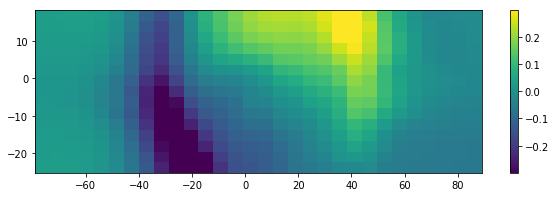

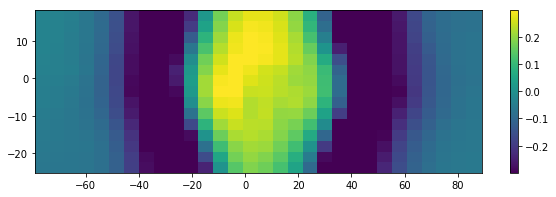

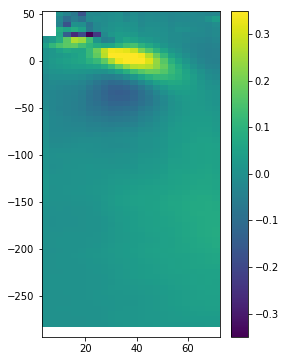

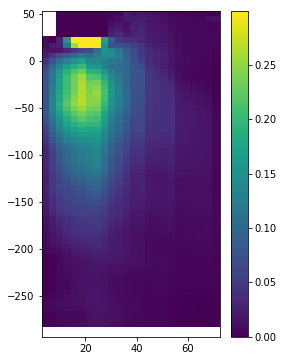

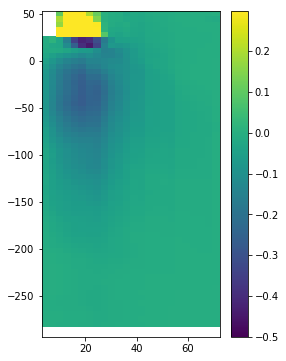

In [340]:
k =52

fig,axs=plt.subplots(1,1,figsize=(10,3))
plt.pcolormesh(X[...,0],Z[...,0],mean_flow[...,k,1],vmin=-0.3,vmax=0.3)
plt.colorbar()

fig,axs=plt.subplots(1,1,figsize=(10,3))
plt.pcolormesh(X[...,0],Z[...,0],mean_flow[...,k,0],vmin=-0.3,vmax=0.3)
plt.colorbar()



#fig,axs=plt.subplots(1,1,figsize=(10,3))
#plt.pcolormesh(X[...,0],Z[...,0],Ur[...,k],vmin=-0.3,vmax=0.3)
dtheta = 2*np.pi/50
theta = np.arange(np.pi/2,2*np.pi+np.pi/2,dtheta)
dr = dz
R0 = np.arange(dz,dz*(Nx-5),dz)
Nr = len(R0)

#plt.plot(np.min(R0)*np.cos(theta),np.min(R0)*np.sin(theta),'r')
#plt.plot(np.max(R0)*np.cos(theta),np.max(R0)*np.sin(theta),'r')

UR = np.zeros((Ny,Nr))
UT = np.zeros((Ny,Nr))
UZ = np.zeros((Ny,Nr))

for i in range(len(y)):
    for j,r0 in enumerate(R0):
        UR[i,j] = np.nanmean(fur((r0*np.cos(theta),r0*np.sin(theta),y[i])))
        UT[i,j] = np.nanmean(fut((r0*np.cos(theta),r0*np.sin(theta),y[i])))
        UZ[i,j] = np.nanmean(fut((r0*np.cos(theta),r0*np.sin(theta),y[i])))
    

fig,axs=plt.subplots(1,1,figsize=(4,6))
plt.pcolormesh(Rf,Yf,UR,vmin=-0.35,vmax=0.35)
plt.colorbar()


fig,axs=plt.subplots(1,1,figsize=(4,6))
plt.pcolormesh(Rf,Yf,-UT,vmin=0.,vmax=0.3)
plt.colorbar()

fig,axs=plt.subplots(1,1,figsize=(4,6))
plt.pcolormesh(Rf,Yf,UZ,vmin=-0.5,vmax=0.3)
plt.colorbar()

y
#fig,axs=plt.subplots(1,1,figsize=(10,3))
#plt.pcolormesh(X[...,0],Z[...,0],Utheta[...,k],vmin=-0.3,vmax=0.3)
#plt.colorbar()



#fig,axs=plt.subplots(1,1,figsize=(5,8))
#plt.pcolormesh(X[0,...],Y[0,...],mean_flow[6,...,1],vmin=-0.3,vmax=0.3)
#plt.colorbar()

In [192]:
#definition of mask
x0 = 175
y0 = 130
width = 120
height = 50

ValueError: cannot reshape array of size 31248 into shape (1,63)

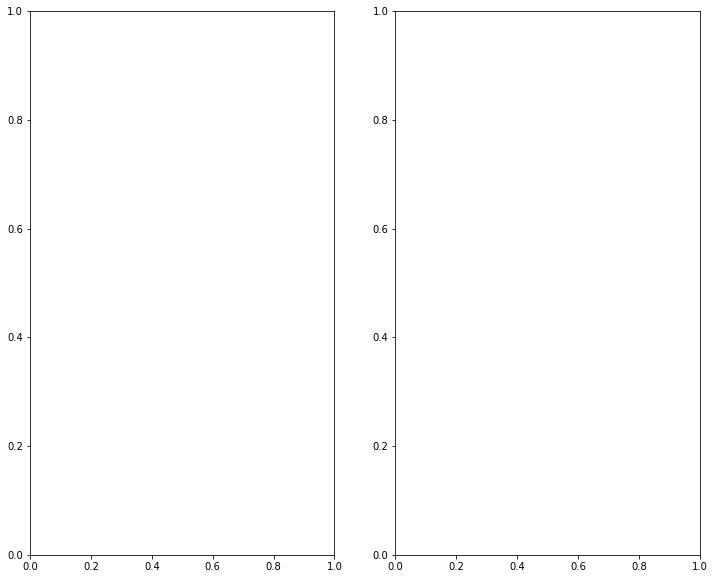

In [121]:
fig,axs=plt.subplots(1,2,figsize=(12,10)); axs=axs.flatten()
cax=[]
c=[]
j = 10
#for i in range(2):
#    divider = make_axes_locatable(axs[i])
#    cax.append(divider.append_axes('right', size='10%', pad=0.1))
    
for (i,data) in zip(range(2),[mean_speed[j,:,:],u_rms[j,:,:]]):
    #axs[i].clear()
    cb=axs[i].pcolormesh(X,Y,data,vmin=0,vmax=0.4)
#            cb=axs[i].pcolormesh(X,Y,ff[0,j,:,:,1],vmin=0,vmax=0.3)
#    fig.colorbar(cb)
#    c.append(fig.colorbar(cb, cax=cax[i], orientation='vertical'))

    axs[0].set_title(r'$y = '+str(int(z[j]))+' mm')
        #axs[1].set_title(r'$\bar u_{rms}$')

    axs[0].set_xlabel('$z$ (mm)')
    axs[i].set_xlabel('$x$ (mm)')
    #c[0].set_label(r'$\bar u$ (m/s)')
    #c[0].set_label(r'$\bar u_{rms}$ (m/s)')
    
    p=patches.Rectangle((x0,y0),width,height,facecolor='w',edgecolor='r')
    axs[i].add_patch(p)